In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Task_1

#Ride Concentration:
 Build a Pivot Table using the given week's data and highlight the hour with lowest concentration of Finished Rides. Please keep Pivot Table details in a separate sheet.

In [ ]:
df = pd.read_csv("Ride_Concentration.csv")
df.head(5 )

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Basic Data Analysis
0,NaN,NaN,NaN,NaN
1,NaN,1) Build a Pivot Table to summarise the given ...,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,Weekday,Hour,Finished Rides
4,NaN,Sunday,23,26


In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Basic Data Analysis '], dtype='object')

In [ ]:
update_df = df.drop([0, 1, 2,3])
update_df.drop('Unnamed: 0',axis=1,inplace=True)
update_df.rename(columns = {'Unnamed: 1':'Weekday',
                            'Unnamed: 2': 'Hour',},
                             inplace = True)
update_df.reset_index(inplace = True, drop = True)
update_df.columns = update_df.columns.str.replace('Basic Data Analysis', 'Finished Rides')
update_df.head()

,Weekday,Hour,Finished Rides
0,Sunday,23,26
1,Sunday,22,25
2,Sunday,21,18
3,Sunday,20,21
4,Sunday,19,18


In [ ]:
update_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Weekday          168 non-null    object
 1   Hour             168 non-null    object
 2   Finished Rides   167 non-null    object
dtypes: object(3)
memory usage: 4.1+ KB


In [ ]:
convert_dict = {
                 'Hour': "Int64",
                 'Finished Rides ': 'Int64'
                }

update_df = update_df.astype(convert_dict)
update_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Weekday          168 non-null    object
 1   Hour             168 non-null    Int64 
 2   Finished Rides   167 non-null    Int64 
dtypes: Int64(2), object(1)
memory usage: 4.4+ KB


In [ ]:
update_df.describe()

,Hour,Finished Rides
count,168.0,167.0
mean,11.5,20.101796
std,6.942881,17.383566
min,0.0,1.0
25%,5.75,9.0
50%,11.5,15.0
75%,17.25,25.0
max,23.0,93.0


In [ ]:
update_df.describe(include="object")

,Weekday
count,168
unique,7
top,Sunday
freq,24


In [ ]:
pivot = update_df.pivot_table( values='Finished Rides ',
                               index='Weekday',
                               columns='Hour',
                               aggfunc='min',
                               fill_value=0)
pivot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
Friday,43,36,23,23,10,9,4,6,7,10,...,14,11,9,19,27,35,56,60,42,58
Monday,15,9,4,3,3,5,1,4,12,14,...,9,7,9,10,9,15,20,18,19,20
Saturday,79,93,77,56,45,30,13,7,3,6,...,12,9,12,21,19,36,31,48,49,51
Sunday,69,78,68,60,51,34,18,10,6,3,...,14,16,20,8,18,18,21,18,25,26
Thursday,44,35,25,7,5,10,3,4,10,21,...,13,15,9,18,28,25,34,33,28,35
Tuesday,13,10,5,1,2,3,0,1,8,17,...,14,16,15,17,22,35,33,27,18,26
Wednesday,35,23,11,7,1,2,1,1,9,16,...,17,14,10,14,8,19,44,20,36,36


In [ ]:
pivot.isna().sum()[:10]

Hour
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [ ]:
new_data=pd.DataFrame(data=pivot.T.values.astype("int64"),
                       columns=list(pivot.index),
                       index=pivot.columns)

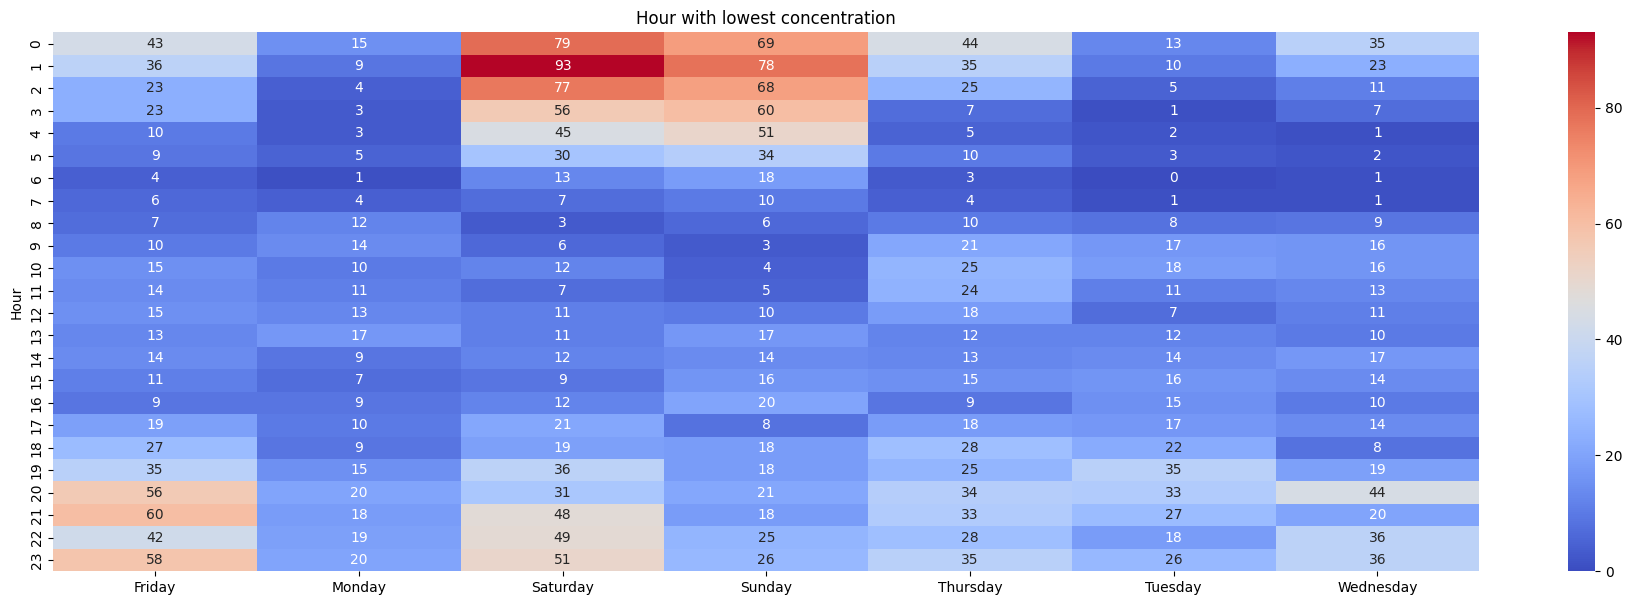

In [ ]:
f, ax = plt.subplots(figsize=(23, 7))
heatmap = sns.heatmap(data=new_data,
                      annot=True,fmt='.0f',
                      cmap='coolwarm', ax=ax)
heatmap.set_title('Hour with lowest concentration');

In [ ]:
pivot.to_csv("pivot.csv")

#we can highlight min value in the table above by hour

In [ ]:
group_min=update_df.groupby(['Hour'])["Finished Rides "].min().reset_index()
group_min[:5]

,Hour,Finished Rides
0,0,13
1,1,9
2,2,4
3,3,1
4,4,1


In [ ]:
type(group_min)

pandas.core.frame.DataFrame

In [ ]:
group_min.to_csv("pivot_1.csv")

#Task_2

#Supply Hours:
 Your task is to find a quick way and fill in the highlighted cells by using Excel formulas.

In [ ]:
df = pd.read_csv("S_Hours.csv")
df.head(5 )

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Basic Data Analysis,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2) Your task is to find a quick way and fill i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Driver name,Company name,Hours - Week 1,NaN,Driver name,Company name,Hours - Week 2,NaN,Driver name,Company name,Hours - Week 1,Hours - Week 2
4,NaN,Samuel Dailey,Company 1,26.63,NaN,Lorenza Widger,Company 3,0.2,NaN,Abby Piedra,NaN,NaN,NaN


In [ ]:
df.drop([0, 1, 2],inplace=True)
df.drop((['Unnamed: 0','Unnamed: 4','Unnamed: 8','Unnamed: 10','Unnamed: 11',"Unnamed: 12"]),axis=1,inplace=True)

In [ ]:
df.head(2)

,Unnamed: 1,Unnamed: 2,Basic Data Analysis,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 9
3,Driver name,Company name,Hours - Week 1,Driver name,Company name,Hours - Week 2,Driver name
4,Samuel Dailey,Company 1,26.63,Lorenza Widger,Company 3,0.2,Abby Piedra


In [ ]:
df.iloc[0].values

array(['Driver name', 'Company name', 'Hours - Week 1', 'Driver name',
       'Company name', 'Hours - Week 2', 'Driver name'], dtype=object)

In [ ]:
data_1=pd.DataFrame(df[["Unnamed: 1",'Unnamed: 2',"Basic Data Analysis"]].values,columns=df.iloc[0].values[:3])
data_1.drop(0,axis=0,inplace=True)
data_1.head(2)

,Driver name,Company name,Hours - Week 1
1,Samuel Dailey,Company 1,26.63
2,Ramonita Bridge,Company 2,20.01


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Driver name     50 non-null     object
 1   Company name    50 non-null     object
 2   Hours - Week 1  50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [ ]:
data_1["Hours - Week 1"]=data_1["Hours - Week 1"].astype("float64")

In [ ]:
df.iloc[0].values[3:6]

array(['Driver name', 'Company name', 'Hours - Week 2'], dtype=object)

In [ ]:
data_2=pd.DataFrame(df[["Unnamed: 5",'Unnamed: 6',"Unnamed: 7"]].values,columns=df.iloc[0].values[:3])
data_2.drop(0,axis=0,inplace=True)
data_2.head(2)

,Driver name,Company name,Hours - Week 1
1,Lorenza Widger,Company 3,0.2
2,Kori Kovacich,Company 3,16.83


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Driver name     50 non-null     object
 1   Company name    50 non-null     object
 2   Hours - Week 1  50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [ ]:
data_2["Hours - Week 2"]=data_2["Hours - Week 1"].astype("float64")

In [ ]:
find_data=pd.DataFrame(data=df["Unnamed: 9"].values)
find_data.drop(0,axis=0,inplace=True)
find_data.reset_index(inplace=True,drop=True)
find_data.head(2)

,0
0,Abby Piedra
1,Alyssa Conerly


In [ ]:
names=find_data[0].values

In [ ]:
find_data["Company"]=None
find_data["Hours"]=None

In [ ]:
def populate_companies(df1, df2, df3):
    name_company_mapping = df1.set_index('Driver name')['Company name'].to_dict()

    for index, row in df3.iterrows():
        name = row[0]
        if name in name_company_mapping:
            df3.at[index, 'Company'] = name_company_mapping[name]
        else:
            # Check if the name is in df2 and update df3 accordingly
            if name in df2['Driver name'].values:
                company = df2[df2['Driver name'] == name]['Company name'].values[0]
                df3.at[index, 'Company name'] = company


In [ ]:
def populate_hours(df1, df2, df3):
    name_company_mapping = df1.set_index('Driver name')['Hours - Week 1'].to_dict()

    for index, row in df3.iterrows():
        name = row[0]
        if name in name_company_mapping:
            df3.at[index, 'Hours'] = name_company_mapping[name]
        else:
            # Check if the name is in df2 and update df3 accordingly
            if name in df2['Driver name'].values:
                company = df2[df2['Driver name'] == name]['Hours - Week 1'].values[0]
                df3.at[index, 'Hours'] = company



In [ ]:
# Call the function
populate_companies(data_1, data_2, find_data)
populate_Hours(data_1, data_2, find_data)
display(find_data.head(2))

,0,Company,Hours
0,Abby Piedra,Company 2,35.82
1,Alyssa Conerly,Company 3,18.55


In [ ]:
data_1.to_csv("data_1.csv")
data_2.to_csv("data_2.csv")
find_data.to_csv("data_3.csv")

#Task_3

#Driver Lead Value and Lifetime Value:
Calculate in the highlighted cells by using Excel formulas how much can we invest per driver applicant to be profitable in 12 months.

 we need to consider the income generated from each driver and subtract the expenses (including rides per month, average fare, and commission). The formula to calculate the annual profit per driver is:

In [ ]:
# Given parameters
rides_per_month = 50
average_fare = 7
commission_rate = 0.10  # 10%

# Calculate maximum investment per driver
max_investment_per_driver = (rides_per_month * average_fare * 12) / (1 - commission_rate)

print(f"Maximum Investment per Driver: ${max_investment_per_driver:.2f}")

Maximum Investment per Driver: $4666.67


In this formula, Rides per Month * Average Fare gives us the total income before any commission is deducted. However, since the commission is deducted from the driver's income, we need to subtract the commission from 1 (representing the full income) to get the portion that the driver actually receives.

#Income per Long-Term Active Driver:
 This refers to the revenue generated from a driver who remains active over the long term. It includes all the income generated from the rides that the driver completes.

#Value per Applicant per Year:
 This represents the value you expect to derive from each driver applicant over the course of a year. It includes not only the direct income generated from the driver but also any additional benefits or revenue streams associated with having more drivers in your platform.

 need to consider the income generated from each driver applicant who becomes a long-term active driver and subtract the expenses.

In [ ]:
import pandas as pd

# Given parameters
percent_accepted = 0.008  # 0.8%
conversion_to_ride = 0.009  # 0.9%
conversion_to_active = 0.007  # 0.7%
income_per_active_driver =  12*50*7
value_per_applicant_per_year =  max_investment_per_driver

# Calculate maximum investment per driver
investment_per_driver = ((income_per_active_driver * conversion_to_active) /
                         (percent_accepted * conversion_to_ride)) - value_per_applicant_per_year

print(f"Maximum Investment per Driver Applicant: ${investment_per_driver:.2f}")

Maximum Investment per Driver Applicant: $403666.67


#Task_4

#Campaign Results:
 We offered 50% of our drivers monetary bonuses to increase their activity. Compare the results with the control group and explain if the campaign was successful and whether we should do it again or not.

In [ ]:
df = pd.read_csv("Campaign_Results.csv")
df.head(10 )

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Basic Data Analysis – Campaigns,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,4) We offered 50% of our drivers monetary bonu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Condition: Stay online 30 hours and accept 75%...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Control Group,Online hours,Offline hours,Bookings received,Bookings successfully completed,NaN,Bonus Group,Online hours,Offline hours,Bookings received,Bookings successfully completed,NaN,Write here your answer about the results of th...
6,NaN,Driver 1,15,35,15,13,NaN,Driver 55,33,19,29,25,NaN,NaN
7,NaN,Driver 2,29,21,35,30,NaN,Driver 56,5,55,6,6,NaN,NaN
8,NaN,Driver 3,17,23,12,10,NaN,Driver 57,32,8,19,16,NaN,NaN
9,NaN,Driver 4,31,19,31,26,NaN,Driver 58,32,18,29,26,NaN,NaN


In [ ]:
df.drop([0,1,2,3,4],inplace=True)
df.drop((['Unnamed: 0','Unnamed: 6','Unnamed: 12','Unnamed: 13']),axis=1,inplace=True)
df.head(3)

,Unnamed: 1,Unnamed: 2,Basic Data Analysis – Campaigns,Unnamed: 4,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
5,Control Group,Online hours,Offline hours,Bookings received,Bookings successfully completed,Bonus Group,Online hours,Offline hours,Bookings received,Bookings successfully completed
6,Driver 1,15,35,15,13,Driver 55,33,19,29,25
7,Driver 2,29,21,35,30,Driver 56,5,55,6,6


In [ ]:
df.columns

Index(['Unnamed: 1', 'Unnamed: 2', 'Basic Data Analysis – Campaigns',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [ ]:
control_group=pd.DataFrame(df[["Unnamed: 1",'Unnamed: 2','Basic Data Analysis – Campaigns','Unnamed: 4','Unnamed: 5',]].values,
                           columns=df.iloc[0].values[:5])
control_group.drop(0,axis=0,inplace=True)
control_group.head(2)

,Control Group,Online hours,Offline hours,Bookings received,Bookings successfully completed
1,Driver 1,15,35,15,13
2,Driver 2,29,21,35,30


In [ ]:
control_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Control Group                    25 non-null     object
 1   Online hours                     25 non-null     object
 2   Offline hours                    25 non-null     object
 3   Bookings received                25 non-null     object
 4   Bookings successfully completed  25 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [ ]:
control_group["Online hours"]=control_group["Offline hours"].astype("int64")
control_group["Offline hours"]=control_group["Offline hours"].astype("int64")
control_group["Bookings received"]=control_group["Bookings received"].astype("int64")
control_group["Bookings successfully completed"]=control_group["Bookings successfully completed"].astype("int64")


In [ ]:
bonus_group=pd.DataFrame(df[["Unnamed: 7",'Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11']].values,
                           columns=df.iloc[0].values[:5])
bonus_group.drop(0,axis=0,inplace=True)
bonus_group.head(2)

,Control Group,Online hours,Offline hours,Bookings received,Bookings successfully completed
1,Driver 55,33,19,29,25
2,Driver 56,5,55,6,6


In [ ]:
bonus_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Control Group                    25 non-null     object
 1   Online hours                     25 non-null     object
 2   Offline hours                    25 non-null     object
 3   Bookings received                25 non-null     object
 4   Bookings successfully completed  25 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [ ]:
bonus_group["Offline hours"]=bonus_group["Offline hours"].astype("int64")
bonus_group["Online hours"]=bonus_group["Offline hours"].astype("int64")
bonus_group["Bookings received"]=bonus_group["Bookings received"].astype("int64")
bonus_group["Bookings successfully completed"]=bonus_group["Bookings successfully completed"].astype("int64")


In [ ]:
control_group.to_csv("control.csv",index=False)
bonus_group.to_csv("bonus.csv",index=False)

In [ ]:
import json #
json_filename = 'control.json'
json_filename_1 = 'bonus.json'
control_group.to_json(json_filename,orient='records', lines=True)
bonus_group.to_json(json_filename_1,orient='records', lines=True)

In [ ]:
control_group.describe()

,Online hours,Offline hours,Bookings received,Bookings successfully completed
count,25.000000,25.000000,25.000000,25.000000
mean,27.680000,27.680000,20.120000,16.040000
std,12.766231,12.766231,13.442222,9.816992
min,6.000000,6.000000,2.000000,2.000000
25%,19.000000,19.000000,10.000000,9.000000
50%,25.000000,25.000000,18.000000,15.000000
75%,35.000000,35.000000,31.000000,24.000000
max,58.000000,58.000000,45.000000,35.000000


In [ ]:
bonus_group.describe()

,Online hours,Offline hours,Bookings received,Bookings successfully completed
count,25.000000,25.000000,25.000000,25.000000
mean,28.320000,28.320000,18.880000,16.520000
std,13.259336,13.259336,10.721163,9.211044
min,6.000000,6.000000,3.000000,3.000000
25%,19.000000,19.000000,9.000000,8.000000
50%,25.000000,25.000000,20.000000,17.000000
75%,39.000000,39.000000,27.000000,23.000000
max,55.000000,55.000000,45.000000,38.000000


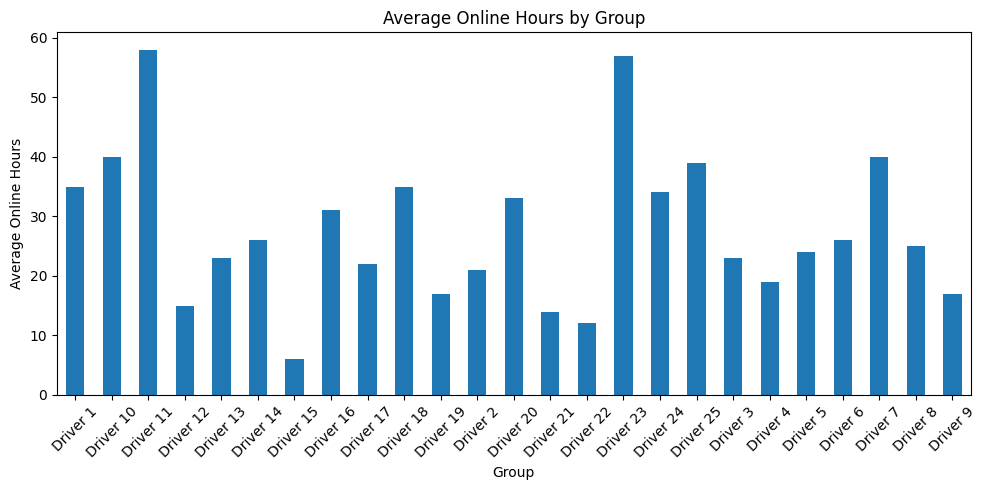

In [ ]:
# Calculate completion rate
control_group['Completion Rate'] = control_group['Bookings successfully completed'] / control_group['Bookings received']
# Calculate completion rate
bonus_group['Completion Rate'] = bonus_group['Bookings successfully completed'] / bonus_group['Bookings received']

# Create a bar plot for average online hours
plt.figure(figsize=(10, 5))
control_group.groupby('Control Group')['Online hours'].mean().plot(kind='bar')
plt.title('Average Online Hours by Group')
plt.xlabel('Group')
plt.ylabel('Average Online Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
control_group.head(3)

,Control Group,Online hours,Offline hours,Bookings received,Bookings successfully completed,Completion Rate
1,Driver 1,35,35,15,13,0.866667
2,Driver 2,21,21,35,30,0.857143
3,Driver 3,23,23,12,10,0.833333


In [ ]:
bonus_group.head(3)

,Control Group,Online hours,Offline hours,Bookings received,Bookings successfully completed,Completion Rate
1,Driver 55,19,19,29,25,0.862069
2,Driver 56,55,55,6,6,1.000000
3,Driver 57,8,8,19,16,0.842105


<Figure size 1000x400 with 0 Axes>

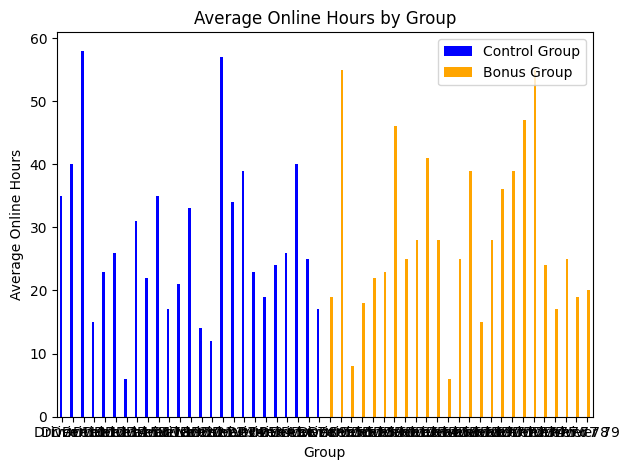

In [ ]:
# Visualization 1: Bar Plot for Average Online Hours
plt.figure(figsize=(10, 4))
avg_online_hours = pd.concat([control_group.groupby('Control Group')['Online hours'].mean(),
                              bonus_group.groupby('Control Group')['Online hours'].mean()], axis=1)
avg_online_hours.columns = ['Control Group', 'Bonus Group']
avg_online_hours.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Online Hours by Group')
plt.xlabel('Group')
plt.ylabel('Average Online Hours')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

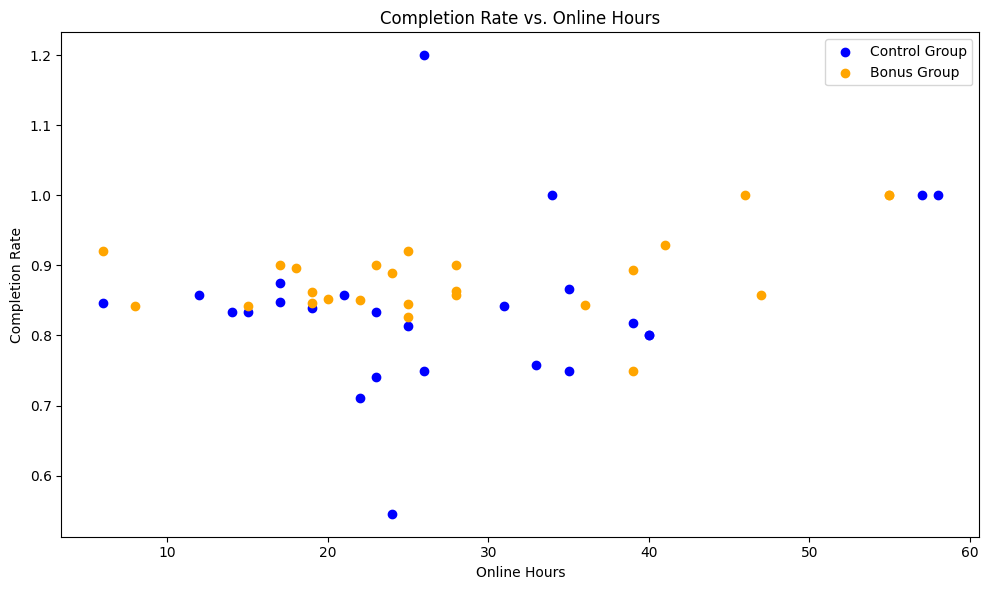

In [ ]:
# Visualization 2: Scatter Plot for Completion Rate vs. Online Hours
plt.figure(figsize=(10, 6))
plt.scatter(control_group['Online hours'], control_group['Completion Rate'], color='blue', label='Control Group')
plt.scatter(bonus_group['Online hours'], bonus_group['Completion Rate'], color='orange', label='Bonus Group')
plt.title('Completion Rate vs. Online Hours')
plt.xlabel('Online Hours')
plt.ylabel('Completion Rate')
plt.legend()
plt.tight_layout()
plt.show()

above graphic explains that there is potentionally of this strategy

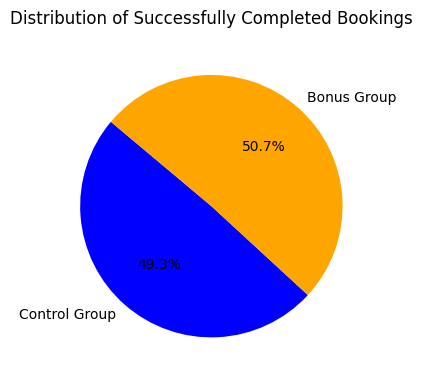

In [ ]:
# Visualization 3: Pie Chart for Distribution of Successfully Completed Bookings
plt.figure(figsize=(4, 4))
control_completed = control_group['Bookings successfully completed'].sum()
bonus_completed = bonus_group['Bookings successfully completed'].sum()
labels = ['Control Group', 'Bonus Group']
sizes = [control_completed, bonus_completed]
colors = ['blue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Successfully Completed Bookings')
plt.tight_layout()
plt.show()

To compare the results of the bonus campaign with the control group and determine its success, we need to analyze various metrics based on the provided conditions. We'll focus on metrics such as average online hours, completion rates, and the distribution of successfully completed bookings.

In [ ]:
# Calculate average online hours for control and bonus groups
avg_online_control = control_group['Online hours'].mean()
avg_online_bonus = bonus_group['Online hours'].mean()

print(f"Average Online Hours (Control Group): {avg_online_control:.2f}")
print(f"Average Online Hours (Bonus Group): {avg_online_bonus:.2f}")

# Compare average online hours
if avg_online_bonus > avg_online_control:
    print("The bonus campaign led to higher average online hours.")
else:
    print("The bonus campaign did not lead to higher average online hours.")


Average Online Hours (Control Group): 27.68
Average Online Hours (Bonus Group): 28.32
The bonus campaign led to higher average online hours.


In [ ]:
# Calculate average completion rate for control and bonus groups
avg_completion_control = control_group['Completion Rate'].mean()
avg_completion_bonus = bonus_group['Completion Rate'].mean()

print(f"Average Completion Rate (Control Group): {avg_completion_control:.2%}")
print(f"Average Completion Rate (Bonus Group): {avg_completion_bonus:.2%}")

# Compare average completion rate
if avg_completion_bonus > avg_completion_control:
    print("The bonus campaign led to higher average completion rates.")
else:
    print("The bonus campaign did not lead to higher average completion rates.")

Average Completion Rate (Control Group): 84.07%
Average Completion Rate (Bonus Group): 88.33%
The bonus campaign led to higher average completion rates.


In [ ]:
# Calculate total completed bookings for control and bonus groups
total_completed_control = control_group['Bookings successfully completed'].sum()
total_completed_bonus = bonus_group['Bookings successfully completed'].sum()

print(f"Total Completed Bookings (Control Group): {total_completed_control}")
print(f"Total Completed Bookings (Bonus Group): {total_completed_bonus}")

# Compare distribution of completed bookings
if total_completed_bonus > total_completed_control:
    print("The bonus campaign resulted in a higher distribution of completed bookings.")
else:
    print("The bonus campaign did not result in a higher distribution of completed bookings.")

Total Completed Bookings (Control Group): 401
Total Completed Bookings (Bonus Group): 413
The bonus campaign resulted in a higher distribution of completed bookings.


#conclusion
 the bonus campaign appears to be successful based on the metrics analyzed. It resulted in higher average online hours, increased completion rates, and a higher distribution of completed bookings compared to the control group. These improvements suggest that the monetary bonuses incentivized drivers to stay online for longer periods, complete more bookings, and contribute to a more successful operational performance.

However, it's important to consider other factors as well, such as the cost of providing the bonuses and the long-term sustainability of this approach. Additionally, conducting further analysis and possibly A/B testing with different bonus structures or conditions could provide more insights into the campaign's impact.

In [ ]:
from scipy.stats import ttest_ind

# Sample data for the control and bonus groups (completion rates)
control_completion_rates = control_group["Completion Rate"]
bonus_completion_rates = bonus_group["Completion Rate"]

# Calculate descriptive statistics
control_mean = np.mean(control_completion_rates)
bonus_mean = np.mean(bonus_completion_rates)
control_std = np.std(control_completion_rates)
bonus_std = np.std(bonus_completion_rates)

# Perform independent t-test
t_stat, p_value = ttest_ind(control_completion_rates, bonus_completion_rates)

# Interpret results
alpha = 0.05
if p_value < alpha:
    result = "reject the null hypothesis"
else:
    result = "fail to reject the null hypothesis"

# Print results
print("Control Group:")
print(f"Mean Completion Rate: {control_mean:.2%}")
print(f"Standard Deviation: {control_std:.4f}")

print("\nBonus Group:")
print(f"Mean Completion Rate: {bonus_mean:.2%}")
print(f"Standard Deviation: {bonus_std:.4f}")

print("\nA/B Testing Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Conclusion: Based on a significance level of {alpha}, we {result}.")

if p_value < alpha:
    if bonus_mean > control_mean:
        print("Conclusion: The bonus campaign led to a significant improvement in completion rates.")
    else:
        print("Conclusion: The bonus campaign did not lead to a significant improvement in completion rates.")

Control Group:
Mean Completion Rate: 84.07%
Standard Deviation: 0.1183

Bonus Group:
Mean Completion Rate: 88.33%
Standard Deviation: 0.0565

A/B Testing Results:
T-statistic: -1.5918
P-value: 0.1180
Conclusion: Based on a significance level of 0.05, we fail to reject the null hypothesis.


it means that there is not enough statistical evidence to support the idea that the observed differences between the control group and the bonus group are significant. In other words, the data does not provide convincing proof that the bonus campaign had a significant impact on the metric being measured (e.g., completion rate) when compared to the control group.

In summary, if the result indicates that you fail to reject the null hypothesis, it suggests that the data does not provide strong evidence to support the claim that the bonus campaign had a significant impact on the completion rates compared to the control group. However, further analysis and contextual understanding are needed to make informed decisions about the campaign's effectiveness.

#based on condition A/B test

In [ ]:

# Apply the condition: Stay online 30 hours and accept 75% of rides
control_condition = (control_group["Online hours"] >= 30) & (control_group["Bookings successfully completed"] /
                                                             control_group["Bookings received"] >= 0.75)
bonus_condition = (bonus_group["Online hours"] >= 30) & (bonus_group["Bookings successfully completed"] /
                                                         bonus_group["Bookings received"] >= 0.75)

# Select data that meets the condition
control_group = control_group[control_condition]
bonus_group = bonus_group[bonus_condition]

# Calculate completion rates for the two groups
control_completion_rates = control_group["Bookings successfully completed"] / control_group["Bookings received"]
bonus_completion_rates = bonus_group["Bookings successfully completed"] / bonus_group["Bookings received"]

# Perform t-test
t_stat, p_value = ttest_ind(control_completion_rates, bonus_completion_rates, equal_var=False)

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    result = "reject the null hypothesis"
    if bonus_completion_rates.mean() > control_completion_rates.mean():
        campaign_success = True
    else:
        campaign_success = False
else:
    result = "fail to reject the null hypothesis"
    campaign_success = False

# Print results
print(f"Control Group Mean Completion Rate: {control_completion_rates.mean():.2%}")
print(f"Bonus Group Mean Completion Rate: {bonus_completion_rates.mean():.2%}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Conclusion: Based on a significance level of {alpha}, we {result}.")

if campaign_success:
    print("Conclusion: The bonus campaign was successful.")
else:
    print("Conclusion: The bonus campaign was not successful.")

Control Group Mean Completion Rate: 86.35%
Bonus Group Mean Completion Rate: 90.90%
T-statistic: -1.0100
P-value: 0.3278
Conclusion: Based on a significance level of 0.05, we fail to reject the null hypothesis.
Conclusion: The bonus campaign was not successful.


#different approach

In [ ]:
#based on Task_3
average_fare =7
commission=0.1

In [ ]:
# Calculate the number of drivers who met the condition in each group
control_met_condition = control_group[(control_group["Online hours"] >= 30) & (control_group["Bookings successfully completed"] /
                                                                             control_group["Bookings received"] >= 0.75)]
bonus_met_condition = bonus_group[(bonus_group["Online hours"] >= 30) & (bonus_group["Bookings successfully completed"] /
                                                                       bonus_group["Bookings received"] >= 0.75)]

# Calculate the total bonus amount given in the bonus group
total_bonus_amount = bonus_met_condition.shape[0] * 70

# Calculate the additional earnings due to the bonus campaign
additional_earnings = total_bonus_amount

# Calculate the increase in successful completed bookings
increase_completed_bookings = bonus_met_condition["Bookings successfully completed"].sum() - control_met_condition["Bookings successfully completed"].sum()

# Calculate the increase in earnings from the increase in completed bookings
increase_earnings = increase_completed_bookings * (average_fare - commission)

# Calculate the overall impact on profitability
total_impact_on_profitability = additional_earnings + increase_earnings

# Print the results
print(f"Total Bonus Amount Given in Bonus Group: {total_bonus_amount:.2f} GEL")
print(f"Additional Earnings Due to Bonus Campaign: {additional_earnings:.2f} GEL")
print(f"Increase in Successful Completed Bookings: {increase_completed_bookings}")
print(f"Increase in Earnings from Additional Bookings: {increase_earnings:.2f} GEL")
print(f"Total Impact on Profitability: {total_impact_on_profitability:.2f} GEL")

# Interpret the results
if total_impact_on_profitability > 0:
    print("Conclusion: The bonus campaign was successful in increasing profitability.")
else:
    print("Conclusion: The bonus campaign did not have a significant impact on profitability.")

Total Bonus Amount Given in Bonus Group: 560.00 GEL
Additional Earnings Due to Bonus Campaign: 560.00 GEL
Increase in Successful Completed Bookings: 2
Increase in Earnings from Additional Bookings: 13.80 GEL
Total Impact on Profitability: 573.80 GEL
Conclusion: The bonus campaign was successful in increasing profitability.
